In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os,sys
import copy
from sklearn.metrics import roc_curve, roc_auc_score

sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py') ##~wont work, has to start with /Users

import ensembl #from st-net
import pandas as pd

from sklearn.metrics import classification_report
#import DataSTNet_test as DataObj

/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_rows', None)
df_json = pd.read_json('../../output/logs/logVitPretrained_XeniumSingleGene.json')
#df_json.loc[df_json.Gene == 'POSTN',:]
#df_json.loc[df_json.Gene == 'IL7R',:]
#df_json.loc[df_json.Gene == 'FASN',:]
df_json

,data,radius,if_froze_vit,learning_rate,weight_decay,batch_size,num_epochs,image_size,patch_size,mlp_head_units,mse_test,mse_valid,mse_valid_best,best_epoch,Gene,clip,test_patient,mse_test_best
0,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000000,128,100,72,12,512-512,0.735616,0.747750,NaN,NaN,NaN,NaN,NaN,NaN
1,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000000,128,100,72,12,512-512,0.846007,0.844772,NaN,NaN,NaN,NaN,NaN,NaN
2,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000000,128,500,72,12,512-512,0.732601,0.744404,0.808016,140.0,NaN,NaN,NaN,NaN
3,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.001000,128,500,72,12,512-512,0.732648,0.744415,0.808013,61.0,NaN,NaN,NaN,NaN
4,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000000,128,500,72,12,512-512,0.843753,0.842307,0.988361,497.0,NaN,NaN,NaN,NaN
5,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.001000,128,500,72,12,512-512,0.843834,0.842413,0.990658,100.0,NaN,NaN,NaN,NaN
6,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000100,32,200,72,12,512-512,0.732527,0.744318,NaN,NaN,NaN,NaN,NaN,NaN
7,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.001000,32,200,72,12,512-512,0.406601,0.411754,NaN,NaN,NaN,NaN,NaN,NaN
8,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.001000,32,200,72,12,512-512,0.396349,0.396089,NaN,NaN,NaN,NaN,NaN,NaN
9,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000100,32,200,72,12,512-512,0.843937,0.842538,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(torch.backends.cudnn.enabled)

True


In [4]:
import VTransformerLib_torch as MyVit
import DataXeniumBreastCancer_SingleGene as DataObj

using default rep1 data
breast_cancer_sample1_rep1
using default Gene
FASN
   ABCC11  ACTA2  ACTG2  ADAM9  ADGRE5  ADH1B  ADIPOQ  AGR3  AHSP  AIF1  ...  \
1     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
2     0.0    0.0    1.0    0.0     0.0    0.0     0.0   2.0   0.0   0.0  ...   
3     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
4     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
5     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   2.0  ...   

   TUBB2B  TYROBP  UCP1  USP53  VOPP1  VWF  WARS  ZEB1  ZEB2  ZNF562  
1     0.0     0.0   0.0    0.0    0.0  0.0   1.0   0.0   0.0     0.0  
2     0.0     0.0   0.0    3.0    0.0  0.0   0.0   0.0   0.0     0.0  
3     0.0     0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0     0.0  
4     0.0     0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0     0.0  
5     0.0     1.0   0.0    2.0    0.0  0.0   0.0   0.0   1.0     0.0  

[5 rows x 313 col

In [5]:
data_set = 'breast_cancer_sample1_rep1'
#TargetGene = 'FASN'
#TargetGene = 'LRRC15'
#TargetGene = 'IL7R'
TargetGene = 'ITGAX'



In [6]:
MyVit.image_size = 72  # We'll resize input images to this size


DataObj.X, DataObj.Y_filtered, voxel_ids_rep1 = DataObj.load_data(data_set, TargetGene)
DataObj.X = np.array(DataObj.X).reshape((len(DataObj.X), 3, MyVit.image_size, MyVit.image_size))

train_data, test_data, train_labels, test_labels = train_test_split(DataObj.X, DataObj.Y_filtered, test_size = 0.2 , random_state=1024)


MyVit.num_class = 1
#######remove bias of cell density, stnet norm

#train_labels_norm = np.log(normalize(train_labels+1, axis=1, norm='l1'))
#test_labels_norm = np.log(normalize(test_labels+1, axis=1, norm='l1'))

#train_labels_norm = np.log(train_labels+1)
#test_labels_norm = np.log(test_labels+1)

x_train = np.array(train_data)
x_test = np.array(test_data)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape
)



ITGAX
   ABCC11  ACTA2  ACTG2  ADAM9  ADGRE5  ADH1B  ADIPOQ  AGR3  AHSP  AIF1  ...  \
1     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
2     0.0    0.0    1.0    0.0     0.0    0.0     0.0   2.0   0.0   0.0  ...   
3     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
4     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   
5     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   2.0  ...   

   TUBB2B  TYROBP  UCP1  USP53  VOPP1  VWF  WARS  ZEB1  ZEB2  ZNF562  
1     0.0     0.0   0.0    0.0    0.0  0.0   1.0   0.0   0.0     0.0  
2     0.0     0.0   0.0    3.0    0.0  0.0   0.0   0.0   0.0     0.0  
3     0.0     0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0     0.0  
4     0.0     0.0   0.0    0.0    0.0  0.0   0.0   0.0   0.0     0.0  
5     0.0     1.0   0.0    2.0    0.0  0.0   0.0   0.0   1.0     0.0  

[5 rows x 313 columns]
(166453, 72, 72, 3)
(166453,)
(133162, 3, 72, 72) (33291, 3, 72

In [7]:
MyVit.batch_size = 128 ################

# Create iterators for the Data loaded using DataLoader module
def np_to_dataLoader(my_x, my_y):
    tensor_x = torch.Tensor(my_x) # transform to torch tensor
    tensor_y = torch.Tensor(my_y)

    my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
    my_dataloader = DataLoader(my_dataset, batch_size = MyVit.batch_size) # create your dataloader
    return my_dataloader


train_data_loader = np_to_dataLoader(x_train, y_train)
valid_data_loader = np_to_dataLoader(x_valid, y_valid)
test_data_loader = np_to_dataLoader(x_test, y_test)

train_data_size = x_train.shape[0]
valid_data_size = x_valid.shape[0]
test_data_size = x_test.shape[0]

NameError: name 'x_valid' is not defined

In [ ]:
MyVit.image_size = 72 

In [ ]:
import os
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "1024"
torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device='cuda:0', abbreviated=False))
#os.environ['CUDA_VISIBLE_DEVICES']=''

if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu"

device = torch.device(dev)

#device = 'cpu'

In [ ]:
data_set = 'breast_cancer_sample1_rep1' ##'BC23810' #patient with largest number of voxels


#modl_file = "../saved_models/ViT_stnetData_"+tst_patient+".h5"
modl_file = "../../saved_models/ViT_pretrained_XeniumBreastCancerDataSingleGene_"+TargetGene+"_"+data_set+".pt"

modl = torch.load(modl_file, map_location=device)
modl.eval()

from transformers import ViTImageProcessor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch32-384")
image_mean, image_std = processor.image_mean, processor.image_std
print(image_mean, image_std)
normalize = transforms.Normalize(mean=image_mean, std=image_std)

image_aug_test = torch.nn.Sequential(
    #transforms.CenterCrop(MyVit.image_size-20),
    #transforms.RandomRotation(degrees=(0, 180)),
    #transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)),
    #transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomVerticalFlip(p=0.5),
    normalize,
    transforms.Resize(MyVit.image_size)
)

def predict_loader(valid_data_loader):
    pred_val = []
    for j, (inputs, labels) in enumerate(valid_data_loader):
        inputs = image_aug_test(inputs)
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Forward pass - compute outputs on input data using the model
        outputs = modl(inputs)
        # Compute loss

        # Calculate validation accuracy
        #ret, predictions = torch.max(outputs.data, 1)
        #correct_counts = predictions.eq(labels.data.view_as(predictions))
        # Convert correct_counts to float and then compute the mean
        #acc = torch.mean(correct_counts.type(torch.FloatTensor))
        # Compute total accuracy in the whole batch and add to valid_acc
        #valid_acc += acc.item() * inputs.size(0)

        pred_val += list(outputs.data.cpu().numpy())
        
    pred_val = np.array(pred_val).flatten()
    return pred_val



In [11]:
pred_te = predict_loader(test_data_loader)
pred_val = predict_loader(valid_data_loader)

In [12]:
test_results = []


#cor_train = np.corrcoef(pred_train[:,j],  y_train[:,j])
#corr_trains.append(cor_train[0,1])

cor_test = np.corrcoef(pred_te,  y_test)
test_results.append(cor_test[0,1])



In [13]:
test_results

[0.06090670814440404]

(array([2.9333e+04, 0.0000e+00, 2.3240e+03, 7.6400e+02, 3.6700e+02,
        3.2800e+02, 1.3300e+02, 3.2000e+01, 6.0000e+00, 4.0000e+00]),
 array([0.        , 0.31780538, 0.63561077, 0.95341615, 1.27122153,
        1.58902692, 1.9068323 , 2.22463768, 2.54244306, 2.86024845,
        3.17805383]),
 <BarContainer object of 10 artists>)

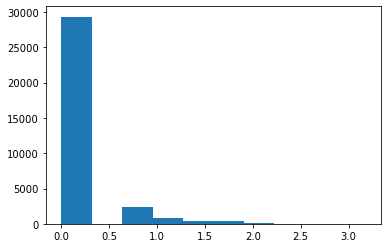

In [14]:
plt.hist(y_test)

(array([5.5000e+01, 1.3947e+04, 1.6243e+04, 1.6510e+03, 7.8300e+02,
        3.8500e+02, 1.5900e+02, 5.0000e+01, 1.3000e+01, 5.0000e+00]),
 array([0.10041054, 0.1026073 , 0.10480407, 0.10700083, 0.10919759,
        0.11139435, 0.11359111, 0.11578787, 0.11798463, 0.1201814 ,
        0.12237816], dtype=float32),
 <BarContainer object of 10 artists>)

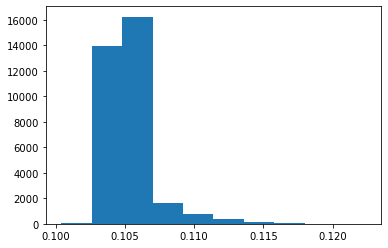

In [15]:
plt.hist(pred_te)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.43909329, -0.33909329, -0.23909329, -0.13909329, -0.03909329,
         0.06090671,  0.16090671,  0.26090671,  0.36090671,  0.46090671,
         0.56090671]),
 <BarContainer object of 10 artists>)

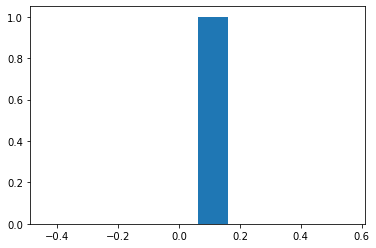

In [16]:
plt.hist(test_results)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.43909329, -0.33909329, -0.23909329, -0.13909329, -0.03909329,
         0.06090671,  0.16090671,  0.26090671,  0.36090671,  0.46090671,
         0.56090671]),
 <BarContainer object of 10 artists>)

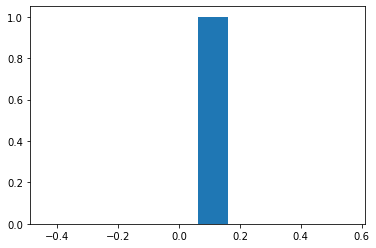

In [17]:
plt.hist(test_results)

In [18]:
val_results = []


cor_test = np.corrcoef(pred_val,  y_valid)
val_results.append(cor_test[0,1])



(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([-0.44352062, -0.34352062, -0.24352062, -0.14352062, -0.04352062,
         0.05647938,  0.15647938,  0.25647938,  0.35647938,  0.45647938,
         0.55647938]),
 <BarContainer object of 10 artists>)

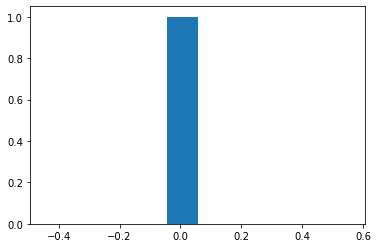

In [19]:
plt.hist(val_results)

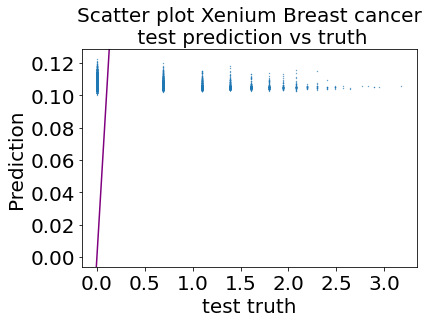

In [20]:
plt.scatter(x = y_test, y = pred_te, s=0.1)
plt.xlabel('test truth', fontsize= 20)
plt.ylabel('Prediction', fontsize= 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('Scatter plot Xenium Breast cancer\n test prediction vs truth', fontsize = 20)
plt.axline([0, 0], slope=1, color = 'purple')
#plt.ylim([0,2])
plt.show()


In [21]:
data_set = 'breast_cancer_sample1_rep2' ##'BC23810' #patient with largest number of voxels
DataObj.X_rep2, DataObj.Y_filtered_rep2, voxel_ids_rep2 = DataObj.load_data(data_set, TargetGene)

ITGAX
   ABCC11  ACTA2  ACTG2  ADAM9  ADGRE5  ADH1B  ADIPOQ  AGR3  AHSP  AIF1  ...  \
1     0.0    2.0    0.0    0.0     0.0    1.0     0.0   0.0   0.0   1.0  ...   
2     0.0    1.0    1.0    0.0     0.0    1.0     0.0   0.0   0.0   4.0  ...   
3     0.0    1.0    0.0    1.0     1.0    1.0     0.0   0.0   0.0   1.0  ...   
4     0.0    0.0    1.0    0.0     0.0    1.0     0.0   0.0   0.0   2.0  ...   
5     0.0    0.0    0.0    0.0     0.0    0.0     0.0   0.0   0.0   0.0  ...   

   TUBB2B  TYROBP  UCP1  USP53  VOPP1  VWF  WARS  ZEB1  ZEB2  ZNF562  
1     0.0     1.0   0.0    0.0    0.0  0.0   0.0   0.0   3.0     0.0  
2     0.0     0.0   0.0    0.0    1.0  0.0   0.0   0.0   2.0     1.0  
3     0.0     0.0   0.0    1.0    0.0  0.0   2.0   0.0   1.0     0.0  
4     0.0     1.0   0.0    0.0    4.0  0.0   0.0   1.0   3.0     3.0  
5     0.0     0.0   0.0    0.0    0.0  0.0   0.0   0.0   1.0     1.0  

[5 rows x 313 columns]
(110048, 72, 72, 3)
(110048,)


In [22]:
DataObj.X_rep2 = np.array(DataObj.X_rep2).reshape((len(DataObj.X_rep2), 3, MyVit.image_size, MyVit.image_size))


In [23]:
#_, x_rep2 = MyVit.norm_img(DataObj.X_rep2, train_scaler)
#rep2_labels_norm = np.log(DataObj.Y_filtered_rep2+1)
x_rep2 = DataObj.X_rep2
y_rep2 = DataObj.Y_filtered_rep2
rep2_data_loader = np_to_dataLoader(x_rep2, y_rep2)


In [24]:
pred_rep2 = predict_loader(rep2_data_loader)

In [25]:
rep2_results = []

cor_test = np.corrcoef(pred_rep2,  y_rep2)
rep2_results.append(cor_test[0,1])



In [26]:
rep2_results

[-0.0003160925767400002]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-5.00316093e-01, -4.00316093e-01, -3.00316093e-01, -2.00316093e-01,
        -1.00316093e-01, -3.16092577e-04,  9.96839074e-02,  1.99683907e-01,
         2.99683907e-01,  3.99683907e-01,  4.99683907e-01]),
 <BarContainer object of 10 artists>)

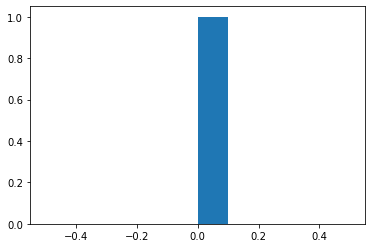

In [27]:
plt.hist(rep2_results)

In [28]:
pred_df = pd.DataFrame()

pred_df = pd.concat([pred_df, pd.DataFrame(np.array(pred_rep2))], ignore_index=True)
    
pred_df.columns = [TargetGene]
pred_df.index = voxel_ids_rep2

pred_df.head()


,ITGAX
9822,0.035160
8729,0.034786
101318,0.035093
9782,0.034092
99417,0.035148


In [29]:
pred_df.to_csv('ViT_xenium_rep2_prediction_'+TargetGene+'.csv')